In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

In [2]:
inventory = pd.read_csv('inventory.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv',parse_dates=True)
stores = pd.read_csv('stores.csv')

In [3]:
inventory.head()

,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


In [4]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [5]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [8]:
stores.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


#### info

In [9]:
print(inventory.info(), '\n\n',products.info(),'\n\n', sales.info(),'\n\n',stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Store_ID       1593 non-null   int64
 1   Product_ID     1593 non-null   int64
 2   Stock_On_Hand  1593 non-null   int64
dtypes: int64(3)
memory usage: 37.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        35 non-null     int64 
 1   Product_Name      35 non-null     object
 2   Product_Category  35 non-null     object
 3   Product_Cost      35 non-null     object
 4   Product_Price     35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      ---

### Data analysis

#### Inventory

In [10]:
columns = inventory.columns

In [11]:
for i in columns:
    print('N# {}:{}'.format(i, len(inventory[i].unique())))


N# Store_ID:50
N# Product_ID:35
N# Stock_On_Hand:93


In [12]:
#Inventory by Store
InventoryByStore= pd.DataFrame(inventory.groupby(['Store_ID']).sum('Stock_On_Hand')['Stock_On_Hand'].sort_values(ascending=False))
InventoryByStore.columns= ['Inventory']


In [13]:
#Stock by Product
StockbyProduct = inventory.groupby(['Store_ID','Product_ID']).sum('Stock_on_Hand').sort_values(ascending=False, by='Stock_On_Hand')
StockbyProduct.head()

,,Stock_On_Hand
Store_ID,Product_ID,
31,10,139
32,10,138
34,25,131
37,8,129
36,25,125


Text(0.5, 1.0, 'Out of stock products')

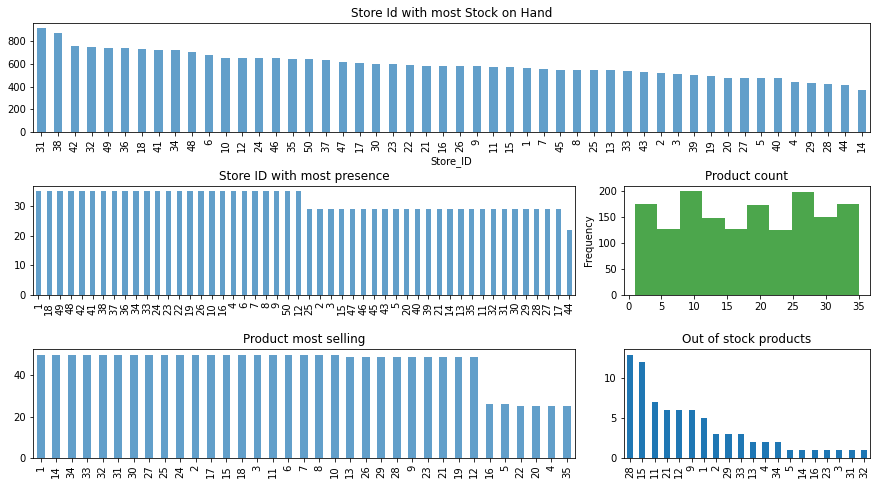

In [14]:
fig = plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((3,3), (0,0), colspan=3)
InventoryByStore['Inventory'].plot(kind='bar',alpha=0.7)
plt.title('Store Id with most Stock on Hand')

plt.subplot2grid((3,3), (1,0), colspan=2)
StockbyProduct.index.get_level_values('Store_ID').value_counts().plot(kind='bar', alpha=0.7)
plt.title('Store ID with most presence')

plt.subplot2grid((3,3), (1,2))
inventory['Product_ID'].plot(kind='hist', alpha=0.7, color='green')
plt.title('Product count')

plt.subplot2grid((3,3), (2,0), colspan=2)
StockbyProduct.index.get_level_values('Product_ID').value_counts().plot(kind='bar',alpha=0.7)
plt.title('Product most selling')

plt.subplot2grid((3,3), (2,2))
StockbyProduct[StockbyProduct['Stock_On_Hand'] == 0].index.get_level_values('Product_ID').value_counts().plot(kind='bar')
plt.title('Out of stock products')

Here are some observations:

The store with most stock are 31 and 38, but it not mean that are better store maybe the best store are those with low inventary, I mean, store that they have sold its products. 

The Store with most seller in quantity are those that have seller to 50 

The products most selling are 28,15, those product are out of stock products in most 10 stores




### Products

In [15]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [16]:
products['Product_Cost']= products['Product_Cost'].str.replace('$','',regex=True)
products['Product_Price']= products['Product_Price'].str.replace('$','',regex=True)

In [17]:
products['Product_Cost']= products['Product_Cost'].astype('float64')
products['Product_Price']= products['Product_Price'].astype('float64')

In [18]:
products['Revenue'] = products['Product_Price'] - products['Product_Cost'] 
products['Returns'] =  round((products['Revenue'] * 100)/products['Product_Cost'],2)


In [19]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Revenue,Returns
0,1,Action Figure,Toys,9.99,15.99,6.0,60.06
1,2,Animal Figures,Toys,9.99,12.99,3.0,30.03
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99,2.0,100.50
3,4,Chutes & Ladders,Games,9.99,12.99,3.0,30.03
4,5,Classic Dominoes,Games,7.99,9.99,2.0,25.03


In [27]:
RevenuebyCategory = products.groupby(['Product_Category'])['Revenue'].mean()
MaxRevenue = products[['Product_Name','Returns']].sort_values(by='Returns', ascending=False).head(10)

In [62]:
d = products.groupby(['Returns'])['Product_Category'].size()

In [63]:
products.groupby(['Returns'])['Product_Category'].size()

Returns
10.01     1
11.12     1
12.52     1
14.29     1
14.30     1
18.20     1
19.06     1
23.82     1
25.02     1
25.03     1
25.06     1
30.03     2
33.36     2
33.37     1
36.40     1
40.03     1
42.89     2
42.92     1
50.13     1
50.25     1
60.06     1
75.19     1
83.47     1
90.99     1
100.20    1
100.25    1
100.50    1
114.45    1
122.36    1
175.44    1
177.98    1
234.11    1
Name: Product_Category, dtype: int64

<AxesSubplot:title={'center':'Test'}, xlabel='Returns'>

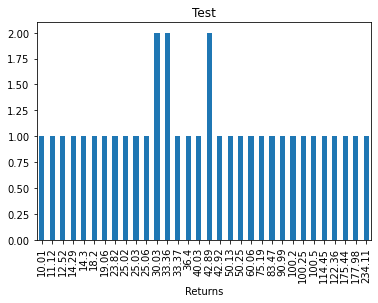

In [64]:
d.plot(kind='bar',stacked=True, title = "Test")

Text(0.5, 1.0, 'Product_Category')

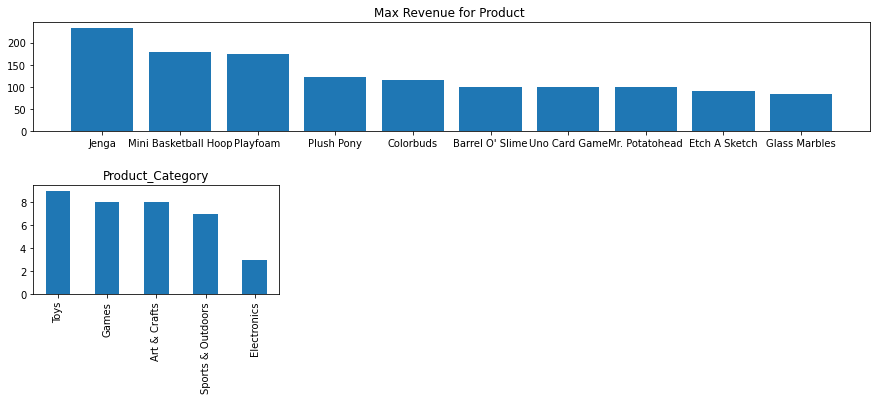

In [20]:
fig = plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((3,3), (0,0), colspan=3)
plt.bar(MaxRevenue['Product_Name'],MaxRevenue['Returns'])
plt.title('Max Revenue for Product ')

plt.subplot2grid((3,3), (1,0))
products['Product_Category'].value_counts().plot(kind='bar')
plt.title('Product_Category')

plt.subplot2grid((3,3), (1,0))
products['Product_Category'].value_counts().plot(kind='bar')
plt.title('Product_Category')



### Sales


In [41]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [35]:
Msales = pd.to_datetime(sales.index).to_period('M')

In [36]:
sales.head()

,Sale_ID,Store_ID,Product_ID,Units
Date,,,,
2017-01-01,1,24,4,1
2017-01-01,2,28,1,1
2017-01-01,3,6,8,1
2017-01-01,4,48,7,1
2017-01-01,5,44,18,1


In [46]:
Units = pd.DataFrame(sales.groupby(['Date'])['Units'].sum())

In [52]:
Units.index.to_period('M')

AttributeError: 'Index' object has no attribute 'to_period'

(array([128., 209., 134.,  84.,  51.,  26.,   5.,   0.,   0.,   1.]),
 array([ 740. , 1175.5, 1611. , 2046.5, 2482. , 2917.5, 3353. , 3788.5,
        4224. , 4659.5, 5095. ]),
 <BarContainer object of 10 artists>)

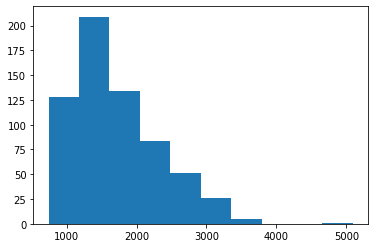

In [45]:
plt.bar(MaxRevenue['Product_Name'],MaxRevenue['Returns'])
plt.bar(Units.index, Units[])

In [17]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [18]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [141]:
VC = pd.merge(sales, products, on=['Product_ID'], how='left')

In [142]:
print(sales.shape,'\n',products.shape,'\n',VC.shape)

(829262, 5) 
 (35, 5) 
 (829262, 9)


In [143]:
VC['Product_Cost'] = VC['Product_Cost'].str.replace('$','',regex=True)
VC['Product_Price'] = VC['Product_Price'].str.replace('$','',regex=True)

In [144]:
VC['Product_Cost'] = VC['Product_Cost'].astype('float64')
VC['Product_Price'] =VC['Product_Price'].astype('float64')

In [145]:
VC['Diff']  = VC['Product_Price'] - VC['Product_Cost'] 

In [146]:

VC['% Profit']  = round(VC['Diff']/VC['Product_Cost'],2)

In [147]:
VC['Reveneu'] = VC['Units']* VC['Product_Price']

In [148]:
VC['Profit'] = VC['Reveneu']*VC['% Profit']

In [149]:
VC.tail()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Diff,% Profit,Reveneu,Profit
829257,829258,2018-09-30,24,19,1,Magic Sand,Art & Crafts,13.99,15.99,2.0,0.14,15.99,2.2386
829258,829259,2018-09-30,16,35,1,Uno Card Game,Games,3.99,7.99,4.0,1.00,7.99,7.9900
829259,829260,2018-09-30,22,19,1,Magic Sand,Art & Crafts,13.99,15.99,2.0,0.14,15.99,2.2386
829260,829261,2018-09-30,13,2,2,Animal Figures,Toys,9.99,12.99,3.0,0.30,25.98,7.7940
829261,829262,2018-09-30,32,6,1,Colorbuds,Electronics,6.99,14.99,8.0,1.14,14.99,17.0886


In [150]:
VC.describe()

,Sale_ID,Store_ID,Product_ID,Units,Product_Cost,Product_Price,Diff,% Profit,Reveneu,Profit
count,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000
mean,414631.500000,25.277034,15.014149,1.315103,9.976460,13.772327,3.795867,0.541406,17.418587,8.184526
std,239387.463802,14.352573,9.869417,0.830701,7.817749,8.664794,2.446922,0.414011,15.522069,9.430839
min,1.000000,1.000000,1.000000,1.000000,1.990000,2.990000,1.000000,0.100000,2.990000,1.099000
25%,207316.250000,13.000000,6.000000,1.000000,3.990000,6.990000,2.000000,0.190000,8.990000,2.995000
50%,414631.500000,26.000000,14.000000,1.000000,7.990000,12.990000,3.000000,0.430000,14.990000,5.276700
75%,621946.750000,38.000000,24.000000,1.000000,11.990000,15.990000,5.000000,0.750000,19.990000,9.594000
max,829262.000000,50.000000,35.000000,30.000000,34.990000,39.990000,16.000000,2.340000,879.780000,273.651000


In [151]:
#### METrics

In [152]:
VCM = VC

In [153]:
VCM= VCM.set_index(['Date'])

In [154]:
VCM.index = pd.to_datetime(VCM.index).to_period('M')

In [155]:
VCM.head()

,Sale_ID,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Diff,% Profit,Reveneu,Profit
Date,,,,,,,,,,,,
2017-01,1,24,4,1,Chutes & Ladders,Games,9.99,12.99,3.0,0.30,12.99,3.8970
2017-01,2,28,1,1,Action Figure,Toys,9.99,15.99,6.0,0.60,15.99,9.5940
2017-01,3,6,8,1,Deck Of Cards,Games,3.99,6.99,3.0,0.75,6.99,5.2425
2017-01,4,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,4.0,0.33,15.99,5.2767
2017-01,5,44,18,1,Lego Bricks,Toys,34.99,39.99,5.0,0.14,39.99,5.5986


In [156]:
ProfitM = VCM.groupby([VCM.index])['Reveneu','Profit'].sum()

<ipython-input-156-fdf7339a96a7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ProfitM = VCM.groupby([VCM.index])['Reveneu','Profit'].sum()


In [157]:
ProfitM = ProfitM.reset_index()

In [158]:
import seaborn as sns

<AxesSubplot:>

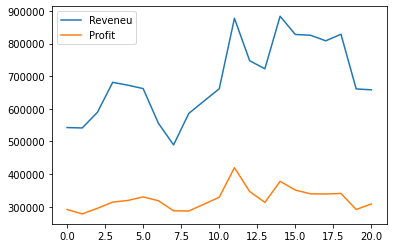

In [159]:
ProfitM.plot.line()

In [160]:
ProfitM['Diff']  = ProfitM['Reveneu'] - ProfitM['Profit']

In [161]:
ProfitM.head()

,Date,Reveneu,Profit,Diff
0,2017-01,542554.91,291674.7445,250880.1655
1,2017-02,541351.65,278077.5217,263274.1283
2,2017-03,589485.19,295312.3402,294172.8498
3,2017-04,681072.98,314185.7778,366887.2022
4,2017-05,672369.90,319396.2201,352973.6799


In [123]:
ProfitM.loc['2018'].sum()

Reveneu    6.962074e+06
Profit     3.008539e+06
Diff       3.953536e+06
dtype: float64

In [128]:
ProfitM.resample('Y').sum()

,Reveneu,Profit,Diff
Date,,,
2017,7.482498e+06,3.778578e+06,3.703920e+06
2018,6.962074e+06,3.008539e+06,3.953536e+06


In [129]:
### tOYS

In [164]:
VC[VC['Product_Category'] == 'Toys']

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Diff,% Profit,Reveneu,Profit
1,2,2017-01-01,28,1,1,Action Figure,Toys,9.99,15.99,6.0,0.60,15.99,9.5940
4,5,2017-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,5.0,0.14,39.99,5.5986
7,8,2017-01-01,19,2,1,Animal Figures,Toys,9.99,12.99,3.0,0.30,12.99,3.8970
13,14,2017-01-01,38,9,1,Dino Egg,Toys,9.99,10.99,1.0,0.10,10.99,1.0990
29,30,2017-01-01,34,18,3,Lego Bricks,Toys,34.99,39.99,5.0,0.14,119.97,16.7958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829246,829247,2018-09-30,30,18,2,Lego Bricks,Toys,34.99,39.99,5.0,0.14,79.98,11.1972
829248,829249,2018-09-30,9,2,1,Animal Figures,Toys,9.99,12.99,3.0,0.30,12.99,3.8970
829249,829250,2018-09-30,13,2,2,Animal Figures,Toys,9.99,12.99,3.0,0.30,25.98,7.7940
829251,829252,2018-09-30,9,18,1,Lego Bricks,Toys,34.99,39.99,5.0,0.14,39.99,5.5986
